In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

music_df = pd.read_csv('../../data/processed_data/DimLoadingsUSA.csv')
# 오디오 파일 로드
y, sr = librosa.load(f'../../data/music/Verified_Normed/{music_df['Music_Id'].iloc[i]}')  # 오디오 파일 로드

In [54]:
# tempo
# 템포를 얻기 위해선 beat가 필요함
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(f"BPM : {tempo[0]:.2f}")

music_df['']

BPM : 83.35


mel : -36.7234 dB


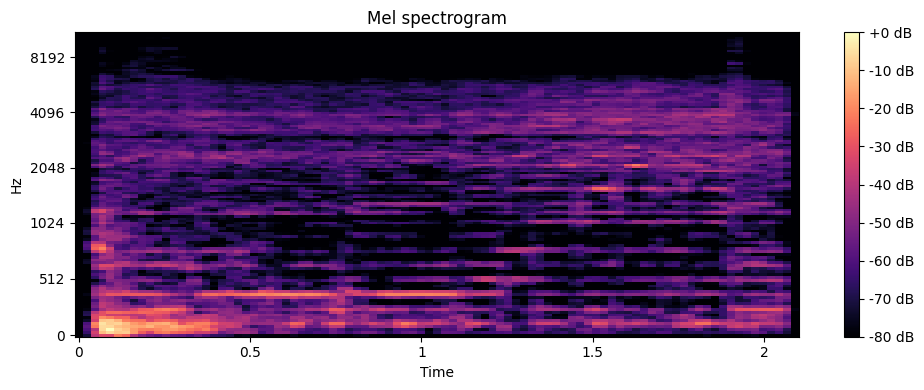

In [51]:
# mel : 사람 귀가 느끼는 실제 에너지
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# 데시벨 단위로 변환 0db가 최대
S_dB = librosa.power_to_db(S, ref=np.max)
mean_mel = np.mean(S_dB)
print(f"mel : {mean_mel:.2f} dB")

# 그래프
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.amplitude_to_db( librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

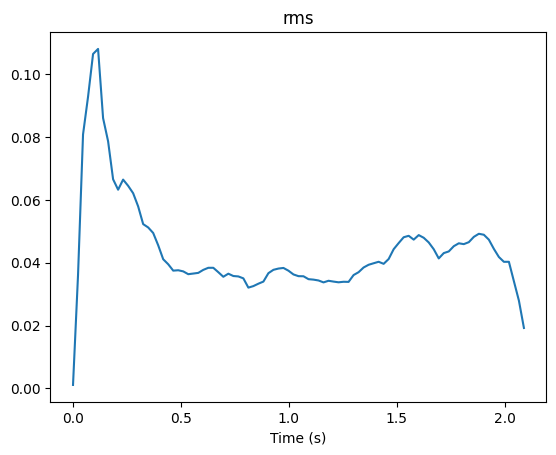

평균 RMS: 0.0442


In [56]:
# rms : 언제 소리가 진폭되는지 알 수 있음
rms = librosa.feature.rms(y=y)
times = librosa.times_like(rms)

mean_rms = np.mean(rms)
max_rms = np.max(rms)

plt.plot(times, rms[0])
plt.title('rms')
plt.xlabel('Time (s)')
plt.show()

print(f"평균 RMS: {mean_rms:.4f}")

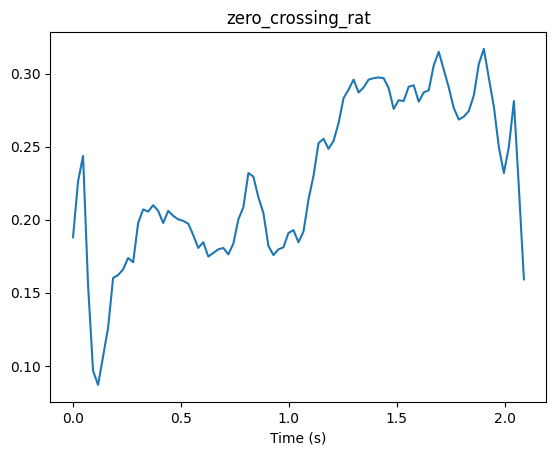

거칠기: 0.2284
거칠기 변화율: 0.0543


In [46]:
# zero_crossing_rate : 얼마나 거칠고 공격적인지
zero = librosa.feature.zero_crossing_rate(y)
times = librosa.times_like(zero)
plt.title('zero_crossing_rat')
plt.xlabel('Time (s)')
plt.plot(times, zero[0])
plt.show()

# 전체 곡의 평균 거칠기 계산 .4F는 반올림~
mean_zcr = np.mean(zero)
print(f"거칠기: {mean_zcr:.2f}")

# 거칠기의 변화 정도 (값이 들쭉날쭉하면 곡의 전개가 다이나믹함)
std_zcr = np.std(zero)
print(f"거칠기 변화율: {std_zcr:.2f}")

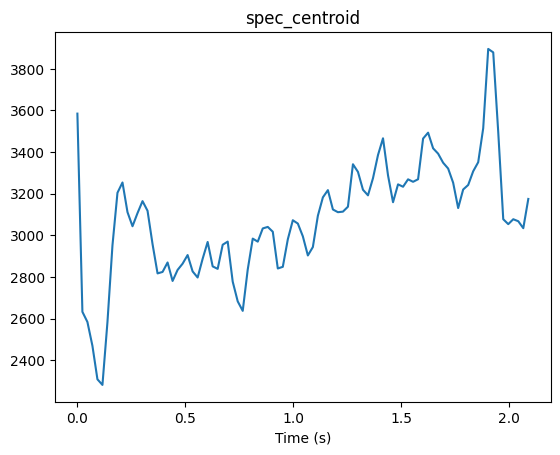

밝기: 3077.4887


In [47]:
# spec_centroid : 소리의 밝기 정도
spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# 시간대 별로 평균
mean_centroid = np.mean(spec_centroid)

# 그래프 그리기
times = librosa.times_like(spec_centroid)
plt.title('spec_centroid')
plt.xlabel('Time (s)')
plt.plot(times, spec_centroid[0])
plt.show()

print(f"밝기: {mean_centroid:.2f}")